In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [9]:
df = pd.read_csv("results80.csv")
len_df = len(df)
df

,Unnamed: 0,iteration,grasp_status,total_time,solution_time_sim,solution_time_real,solution_time_offset,grasp_pose_time,grasp_pose_estimate,offset,grip_time
0,0,1,SUCCESS,6.350,0.075,0.147789,0.072789,3.114,3.022511,0.091489,1.296
1,1,2,SUCCESS,6.144,0.036,0.100400,0.064400,3.104,3.005702,0.098298,1.283
2,2,3,SUCCESS,6.129,0.023,0.070502,0.047502,3.164,2.962179,0.201821,1.276
3,3,4,SUCCESS,6.191,0.150,0.239899,0.089899,3.067,2.942676,0.124324,1.278
4,4,5,SUCCESS,6.133,0.125,0.219268,0.094268,3.037,2.918711,0.118289,1.299
...,...,...,...,...,...,...,...,...,...,...,...
75,75,76,SUCCESS,8.033,0.162,0.194936,0.032936,4.888,4.783449,0.104551,1.283
76,76,77,SUCCESS,8.004,0.040,0.055563,0.015563,4.911,4.797058,0.113942,1.279
77,77,78,SUCCESS,7.889,0.045,0.085546,0.040546,4.860,4.745052,0.114948,1.291
78,78,79,SUCCESS,8.084,0.100,0.130820,0.030820,4.896,4.730146,0.165854,1.288


### Total Time

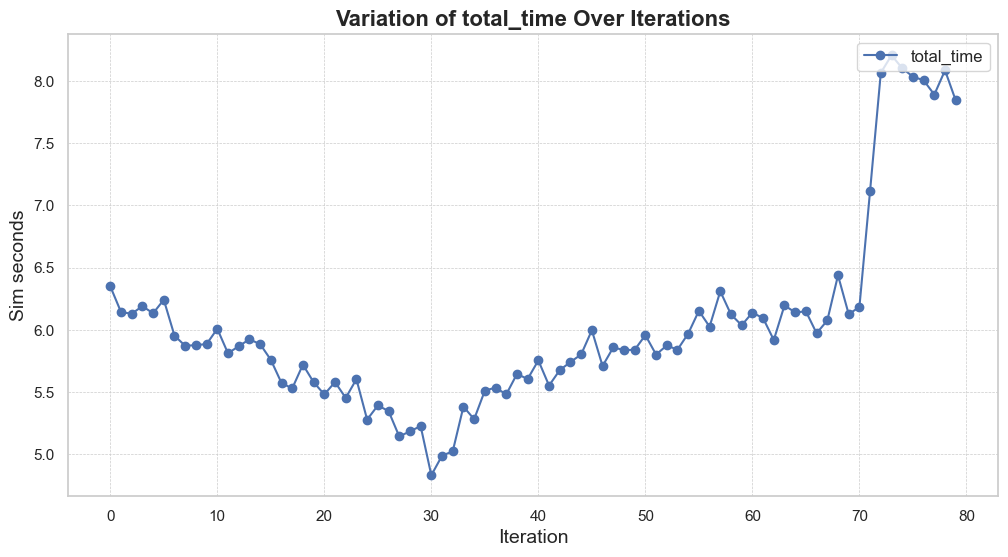

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df['total_time'], label='total_time', marker='o')

plt.title('Variation of total_time Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/total_time{len_df}.png")
plt.show()

### Solution calculation time

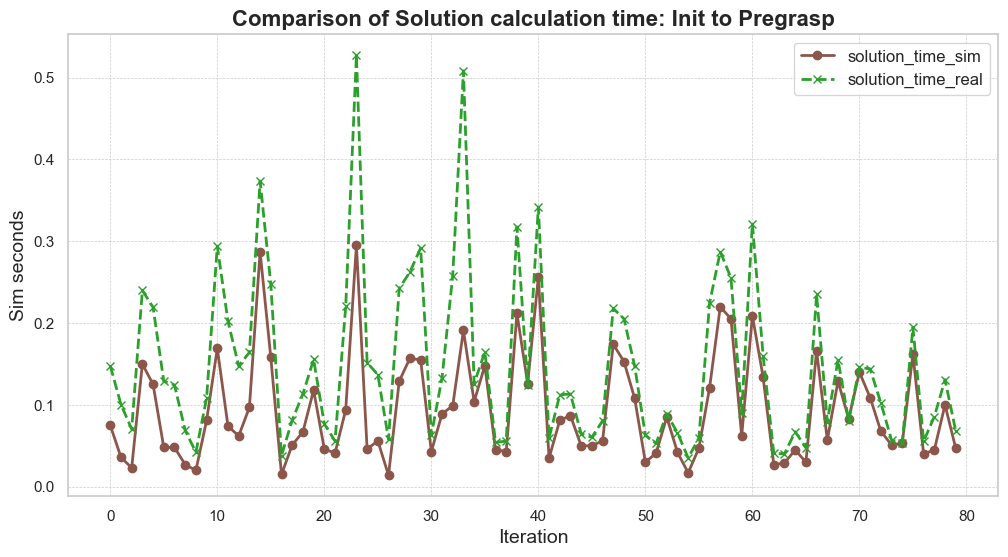

In [7]:
plt.figure(figsize=(12, 6))
plt.title('Comparison of Solution calculation time: Init to Pregrasp')
plt.plot(df['solution_time_sim'], label='solution_time_sim', marker='o', linestyle='-', linewidth=2, color=sns.color_palette("tab10")[5])
plt.plot(df['solution_time_real'], label='solution_time_real', marker='x', linestyle='--', linewidth=2, color=sns.color_palette("tab10")[2])

plt.title('Comparison of Solution calculation time: Init to Pregrasp', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)

plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/solution_time_sim_real{len_df}.png")

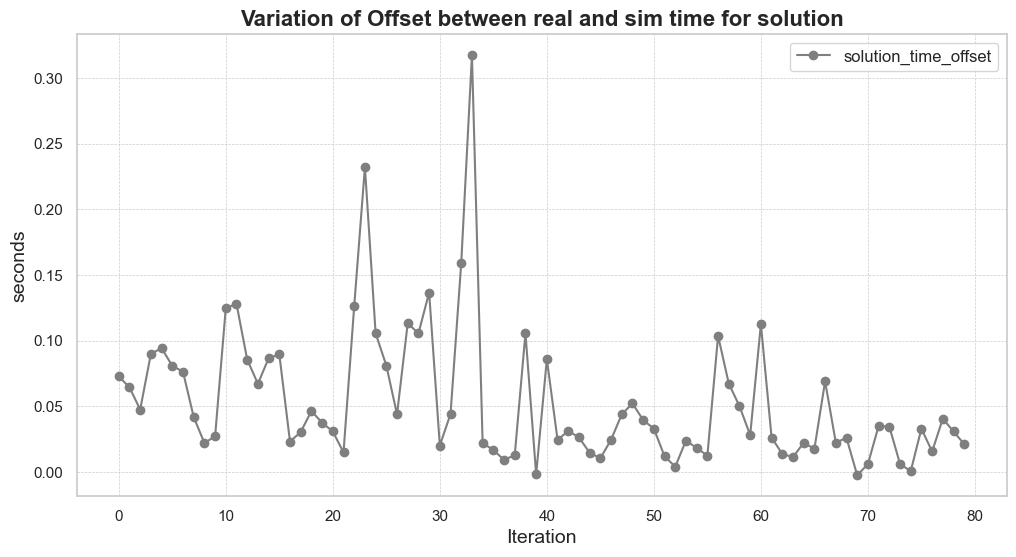

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['solution_time_offset'], label='solution_time_offset', marker='o', color=sns.color_palette("tab10")[7])

plt.title('Variation of Offset between real and sim time for solution', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/solution_time_offset{len_df}.png")

### Pregrasp movement

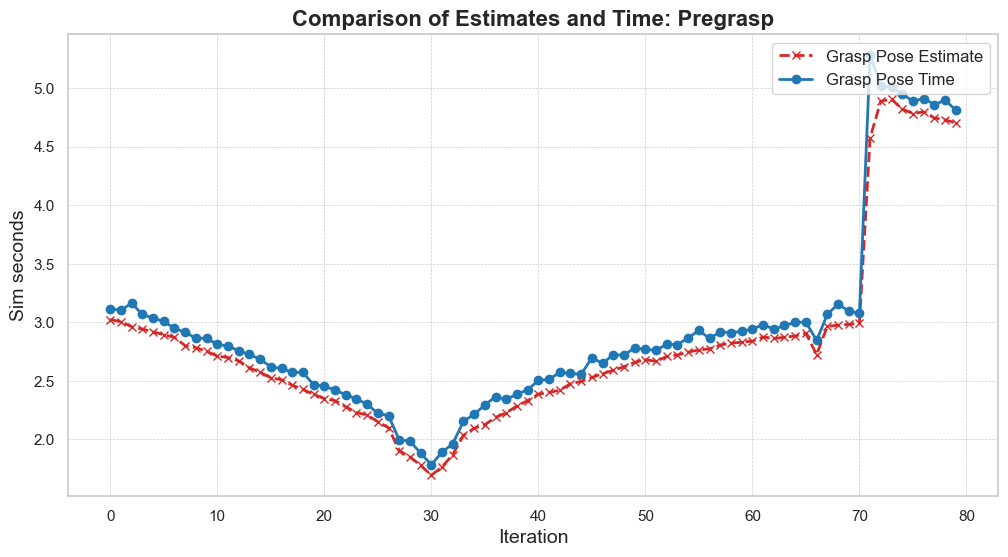

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['grasp_pose_estimate'], label='Grasp Pose Estimate', marker='x', linestyle='--', linewidth=2, color=sns.color_palette("tab10")[3])
plt.plot(df['grasp_pose_time'], label='Grasp Pose Time', marker='o', linestyle='-', linewidth=2, color=sns.color_palette("tab10")[0])

plt.title('Comparison of Estimates and Time: Pregrasp', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)

plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/grasp_pose_estimate_time{len_df}.png")

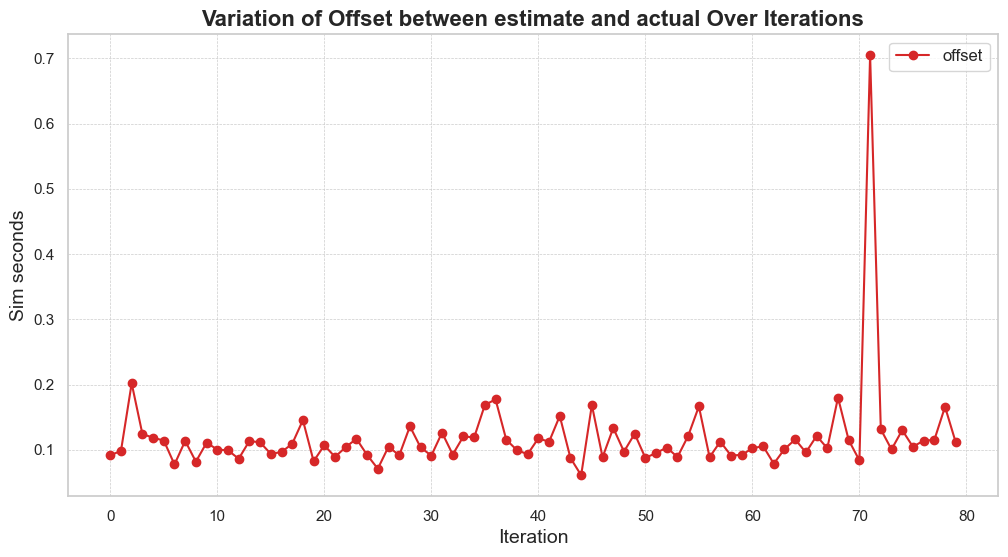

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['offset'], label='offset', marker='o', color=sns.color_palette("tab10")[3])

plt.title('Variation of Offset between estimate and actual Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/offset{len_df}.png")

### Gripping

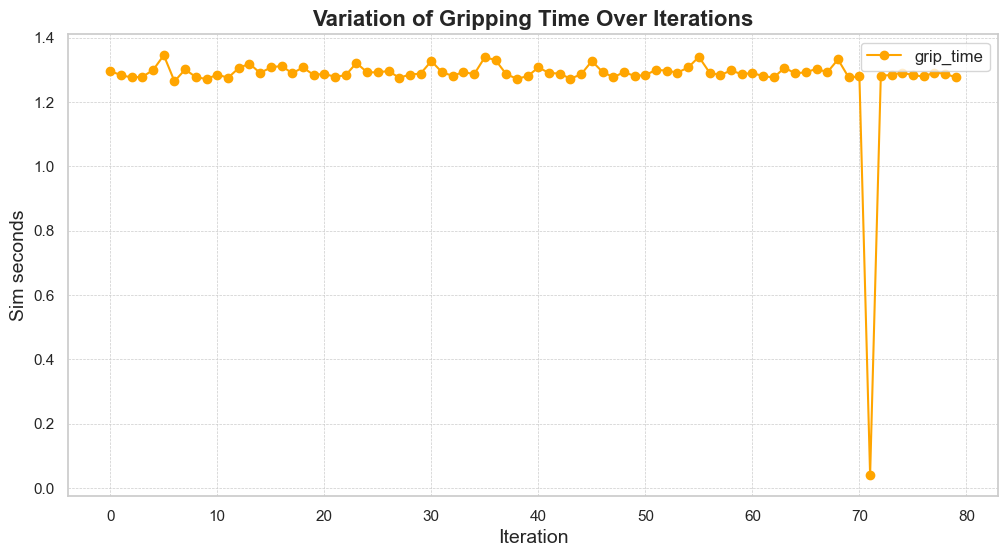

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['grip_time'], label='grip_time', marker='o', color="orange")

plt.title('Variation of Gripping Time Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Sim seconds', fontsize=14)
plt.legend(fontsize=12, loc='upper right')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig(f"./viz_results/grip_time{len_df}.png")

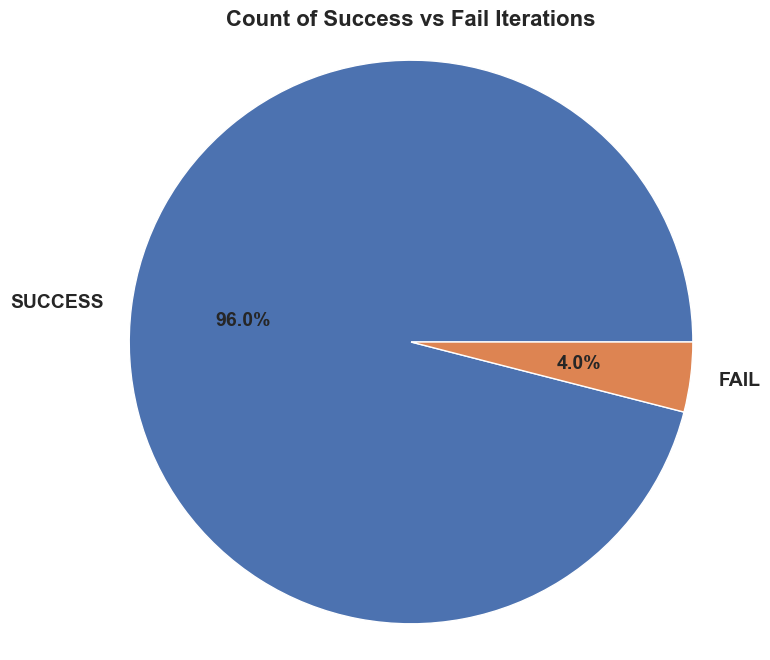

In [17]:
status_count = df['grasp_status'].value_counts()

labels = status_count.index
sizes = status_count.values
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=00,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)
plt.title('Count of Success vs Fail Iterations', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.savefig(f"./viz_results/success_fail{len_df}.png")